In [1]:
import os
from datetime import datetime

import json
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Select latest data file
folder = '../data/'
files = [file for file in os.listdir(folder) if not file.startswith('.~lock') and not file.endswith('.zip')]
most_recent_data_file = max(files, key=lambda x: datetime.strptime(x.split('-')[0] + x.split('-')[1] + x.split('-')[2] + " " + x.split('-')[3] + ":" + x.split('-')[4] + ":" + x.split('-')[5], '%Y%m%d %H:%M:%S'))
data_file = folder + most_recent_data_file
print("Data file: {}".format(data_file))

Data file: ../data/2025-04-10-22-04-20-data-up-to-865042-K-208-chi-4032-k-323-completed.json


In [3]:
# Load data into DataFrame
with open(data_file, 'r') as data_file:
    data = json.load(data_file)
df = pd.DataFrame(data)

In [4]:
# Is df[COLUMN] monotonically increasing?
print("Is df[COLUMN] monotonically increasing/decreasing?\n")
print(f"df['timestamp']     {str(df['timestamp'].is_monotonic_increasing):5}. Should be False.")
print(f"df['proof_score']   {str(df['proof_score'].is_monotonic_increasing):5}. Should be False.")
print(f"df['proof_size']    {str(df['proof_size'].is_monotonic_increasing):5}. Should be False.")
print(f"df['target']        {str(df['target'].is_monotonic_decreasing):5}. Should be False.")

Is df[COLUMN] monotonically increasing/decreasing?

df['timestamp']     False. Should be False.
df['proof_score']   False. Should be False.
df['proof_size']    False. Should be False.
df['target']        False. Should be False.


In [5]:
def is_difficulty_decreasing(row):
    # Extract and sort only the columns that match level_X_difficulty
    level_cols = sorted(
        [col for col in row.index if col.startswith("level_") and col.endswith("_difficulty")],
        key=lambda c: int(c.split("_")[1])  # Sort by level number
    )
    values = [row[col] for col in level_cols if pd.notna(row[col])]
    return all(values[i] <= values[i - 1] for i in range(1, len(values)))

df["valid_difficulty_order"] = df.apply(is_difficulty_decreasing, axis=1)
df[~df["valid_difficulty_order"]]

,target,proof_size,proof_score,proof_level,timestamp,proof_generation_latency,level_0_difficulty,level_1_difficulty,level_2_difficulty,level_3_difficulty,level_4_difficulty,level_5_difficulty,level_6_difficulty,level_7_difficulty,level_8_difficulty,level_9_difficulty,level_10_difficulty,level_11_difficulty,valid_difficulty_order
60803,1551048739079662593758612650769536967206480773...,6259,75190,7,1276480142,1.501560,2495,2495,2495,2496,2423,2066,1427,887,0,0,0,0,False
60804,1551048739079662593758612650769536967206480773...,6260,75207,7,1276480462,1.501799,2494,2495,2495,2496,2423,2066,1427,887,0,0,0,0,False
60805,1551048739079662593758612650769536967206480773...,6256,75164,7,1276480742,1.534700,2493,2494,2495,2496,2423,2066,1427,887,0,0,0,0,False
60806,1551048739079662593758612650769536967206480773...,6257,75181,7,1276481189,1.522541,2492,2494,2495,2496,2423,2066,1427,887,0,0,0,0,False
60807,1551048739079662593758612650769536967206480773...,6251,75114,7,1276483299,1.546621,2491,2493,2494,2496,2423,2066,1427,887,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865038,2928805436162009520992638294218449682899899138...,7078,568293691178182364,11,1728572242,3.169775,18610106273609760,18610106273609760,18610106273609760,18610106273609760,18394290465163413,18283427398326480,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False
865039,2928805436162009520992638294218449682899899138...,7077,568206797443176909,11,1728572873,3.276825,18610106273609760,18610106273609760,18610106273609760,18610106273609760,18394290465163413,18283427398326480,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False
865040,2928805436162009520992638294218449682899899138...,7078,568298847037725394,11,1728573656,3.237486,18610106273609760,18610106273609760,18610106273609760,18610106273609760,18394290465163413,18283427398326480,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False
865041,2928805436162009520992638294218449682899899138...,7076,568122481637942969,11,1728574093,3.186941,18610106273609760,18610106273609760,18610106273609760,18610106273609760,18394290465163413,18283427398326480,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False


In [6]:
# Add block height (index) as column
df["height"] = df.index + 1

In [7]:
# Create datetime objects column from timestamps column
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], unit='s')
df

,target,proof_size,proof_score,proof_level,timestamp,proof_generation_latency,level_0_difficulty,level_1_difficulty,level_2_difficulty,level_3_difficulty,...,level_5_difficulty,level_6_difficulty,level_7_difficulty,level_8_difficulty,level_9_difficulty,level_10_difficulty,level_11_difficulty,valid_difficulty_order,height,timestamp_dt
0,2695953529101130949315647634472399133601089873...,1,1,0,1231006505,0.065565,0,0,0,0,...,0,0,0,0,0,0,0,True,1,2009-01-03 18:15:05
1,2695953529101130949315647634472399133601089873...,2,2,0,1231469665,0.015736,0,0,0,0,...,0,0,0,0,0,0,0,True,2,2009-01-09 02:54:25
2,2695953529101130949315647634472399133601089873...,3,3,0,1231469744,0.012398,0,0,0,0,...,0,0,0,0,0,0,0,True,3,2009-01-09 02:55:44
3,2695953529101130949315647634472399133601089873...,4,4,0,1231470173,0.007391,0,0,0,0,...,0,0,0,0,0,0,0,True,4,2009-01-09 03:02:53
4,2695953529101130949315647634472399133601089873...,5,5,0,1231470988,0.007153,0,0,0,0,...,0,0,0,0,0,0,0,True,5,2009-01-09 03:16:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865038,2928805436162009520992638294218449682899899138...,7078,568293691178182364,11,1728572242,3.169775,18610106273609760,18610106273609760,18610106273609760,18610106273609760,...,18283427398326480,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False,865039,2024-10-10 14:57:22
865039,2928805436162009520992638294218449682899899138...,7077,568206797443176909,11,1728572873,3.276825,18610106273609760,18610106273609760,18610106273609760,18610106273609760,...,18283427398326480,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False,865040,2024-10-10 15:07:53
865040,2928805436162009520992638294218449682899899138...,7078,568298847037725394,11,1728573656,3.237486,18610106273609760,18610106273609760,18610106273609760,18610106273609760,...,18283427398326480,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False,865041,2024-10-10 15:20:56
865041,2928805436162009520992638294218449682899899138...,7076,568122481637942969,11,1728574093,3.186941,18610106273609760,18610106273609760,18610106273609760,18610106273609760,...,18283427398326480,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False,865042,2024-10-10 15:28:13


In [8]:
# Add genesis target and difficulty column
genesis_target = 26959535291011309493156476344723991336010898738574164086137773096960
df['difficulty'] = genesis_target / df['target']
df['difficulty'] = df['difficulty'].astype(float)
df

,target,proof_size,proof_score,proof_level,timestamp,proof_generation_latency,level_0_difficulty,level_1_difficulty,level_2_difficulty,level_3_difficulty,...,level_6_difficulty,level_7_difficulty,level_8_difficulty,level_9_difficulty,level_10_difficulty,level_11_difficulty,valid_difficulty_order,height,timestamp_dt,difficulty
0,2695953529101130949315647634472399133601089873...,1,1,0,1231006505,0.065565,0,0,0,0,...,0,0,0,0,0,0,True,1,2009-01-03 18:15:05,1.000000e+00
1,2695953529101130949315647634472399133601089873...,2,2,0,1231469665,0.015736,0,0,0,0,...,0,0,0,0,0,0,True,2,2009-01-09 02:54:25,1.000000e+00
2,2695953529101130949315647634472399133601089873...,3,3,0,1231469744,0.012398,0,0,0,0,...,0,0,0,0,0,0,True,3,2009-01-09 02:55:44,1.000000e+00
3,2695953529101130949315647634472399133601089873...,4,4,0,1231470173,0.007391,0,0,0,0,...,0,0,0,0,0,0,True,4,2009-01-09 03:02:53,1.000000e+00
4,2695953529101130949315647634472399133601089873...,5,5,0,1231470988,0.007153,0,0,0,0,...,0,0,0,0,0,0,True,5,2009-01-09 03:16:28,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865038,2928805436162009520992638294218449682899899138...,7078,568293691178182364,11,1728572242,3.169775,18610106273609760,18610106273609760,18610106273609760,18610106273609760,...,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False,865039,2024-10-10 14:57:22,9.204959e+13
865039,2928805436162009520992638294218449682899899138...,7077,568206797443176909,11,1728572873,3.276825,18610106273609760,18610106273609760,18610106273609760,18610106273609760,...,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False,865040,2024-10-10 15:07:53,9.204959e+13
865040,2928805436162009520992638294218449682899899138...,7078,568298847037725394,11,1728573656,3.237486,18610106273609760,18610106273609760,18610106273609760,18610106273609760,...,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False,865041,2024-10-10 15:20:56,9.204959e+13
865041,2928805436162009520992638294218449682899899138...,7076,568122481637942969,11,1728574093,3.186941,18610106273609760,18610106273609760,18610106273609760,18610106273609760,...,17595764973471607,17619093983161761,15975641229945955,11893799353064928,8386137681233368,4361826947759648,False,865042,2024-10-10 15:28:13,9.204959e+13


In [9]:
df.dtypes

target                              object
proof_size                           int64
proof_score                          int64
proof_level                          int64
timestamp                            int64
proof_generation_latency           float64
level_0_difficulty                   int64
level_1_difficulty                   int64
level_2_difficulty                   int64
level_3_difficulty                   int64
level_4_difficulty                   int64
level_5_difficulty                   int64
level_6_difficulty                   int64
level_7_difficulty                   int64
level_8_difficulty                   int64
level_9_difficulty                   int64
level_10_difficulty                  int64
level_11_difficulty                  int64
valid_difficulty_order                bool
height                               int64
timestamp_dt                datetime64[ns]
difficulty                         float64
dtype: object

In [10]:
# DataFrame description
df.describe()

,proof_size,proof_score,proof_level,timestamp,proof_generation_latency,level_0_difficulty,level_1_difficulty,level_2_difficulty,level_3_difficulty,level_4_difficulty,level_5_difficulty,level_6_difficulty,level_7_difficulty,level_8_difficulty,level_9_difficulty,level_10_difficulty,level_11_difficulty,height,timestamp_dt,difficulty
count,865043.000000,8.650430e+05,865043.000000,8.650430e+05,865043.000000,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,865043.000000,865043,8.650430e+05
mean,6868.301546,7.509737e+16,9.035949,1.478748e+09,2.652545,2.452610e+15,2.450338e+15,2.445822e+15,2.436713e+15,2.417654e+15,2.381040e+15,2.314427e+15,2.178372e+15,1.927955e+15,1.520286e+15,1.083590e+15,3.544716e+13,432522.000000,2016-11-10 03:15:25.081351680,1.225804e+13
min,1.000000,1.000000e+00,0.000000,1.231007e+09,0.005960,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2009-01-03 18:15:05,1.000000e+00
25%,6739.000000,1.962662e+10,9.000000,1.358011e+09,2.296925,6.759062e+08,6.759062e+08,6.759062e+08,6.638705e+08,6.529866e+08,6.599268e+08,6.692773e+08,5.446153e+08,4.295352e+08,3.082830e+08,0.000000e+00,0.000000e+00,216261.500000,2013-01-12 17:18:25.500000,3.368767e+06
50%,6976.000000,1.380875e+15,10.000000,1.475408e+09,2.773762,4.591723e+13,4.591723e+13,4.585976e+13,4.556905e+13,4.460225e+13,4.399548e+13,4.361866e+13,4.038682e+13,3.056921e+13,2.026207e+13,0.000000e+00,0.000000e+00,432522.000000,2016-10-02 11:27:17,2.412272e+11
75%,7114.000000,1.054927e+17,10.000000,1.600365e+09,3.089666,3.349800e+15,3.349800e+15,3.349800e+15,3.341099e+15,3.323988e+15,3.255828e+15,3.316647e+15,3.274466e+15,2.939859e+15,2.096076e+15,1.304729e+15,0.000000e+00,648782.500000,2020-09-17 17:42:05.500000,1.678778e+13
max,7440.000000,5.731516e+17,11.000000,1.728574e+09,7.646799,1.885863e+16,1.885863e+16,1.885863e+16,1.885863e+16,1.850190e+16,1.828343e+16,1.761151e+16,1.761909e+16,1.597564e+16,1.189380e+16,8.386138e+15,4.361827e+15,865043.000000,2024-10-10 15:30:23,9.267158e+13
std,474.652823,1.320413e+17,1.403760,1.410821e+08,0.653385,4.313866e+15,4.310263e+15,4.302575e+15,4.287453e+15,4.255518e+15,4.196045e+15,4.084972e+15,3.850958e+15,3.383411e+15,2.648959e+15,1.941085e+15,3.794133e+14,249716.548792,NaN,2.147582e+13


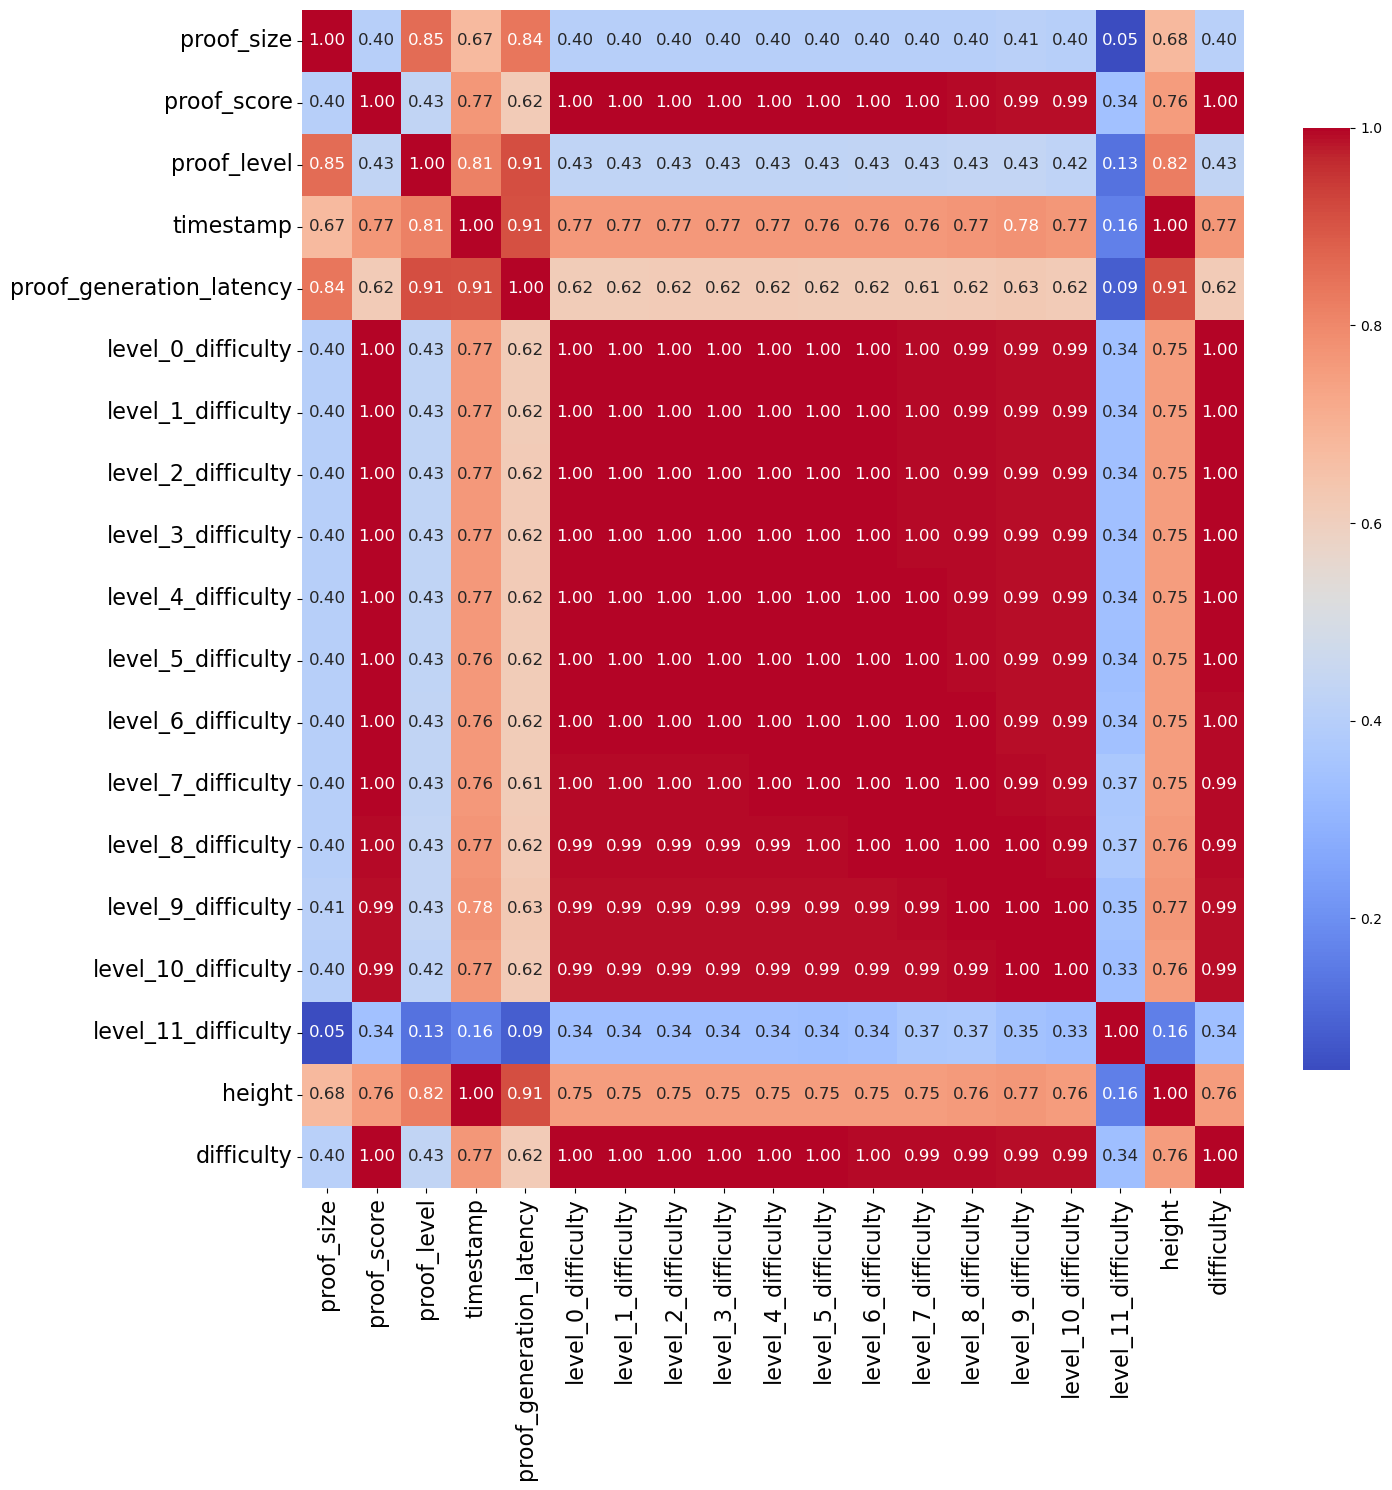

In [12]:
# Correlation matrix
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'size': 12}, cbar_kws={'shrink': 0.8})

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("correlation-matrix.pdf", format="pdf")
plt.show()

/tmp/ipykernel_30822/620208664.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


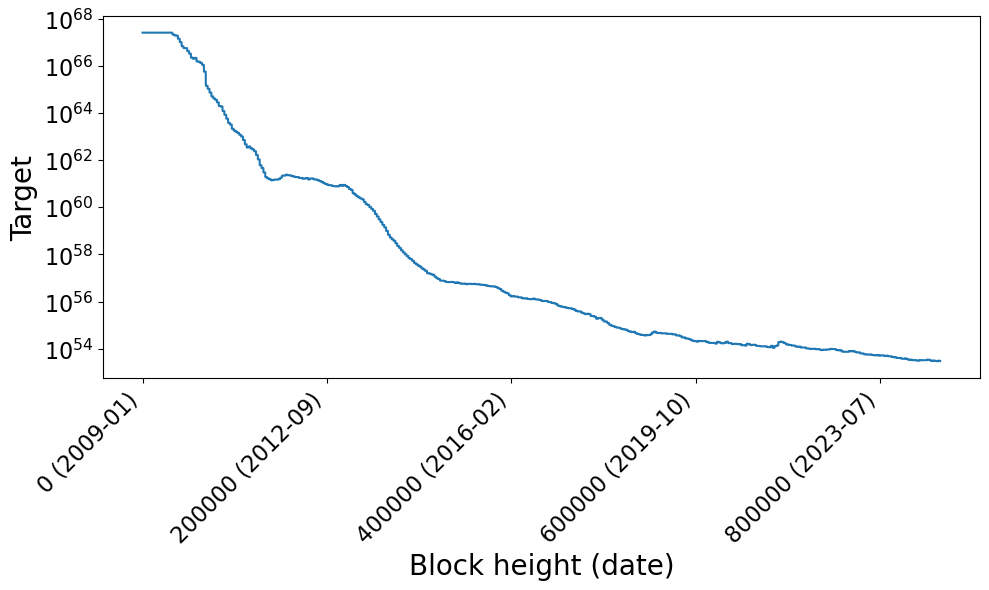

In [13]:
# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['target'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Target', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("target-variation-over-time.pdf", format="pdf")
plt.show()

/tmp/ipykernel_30822/3681305100.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


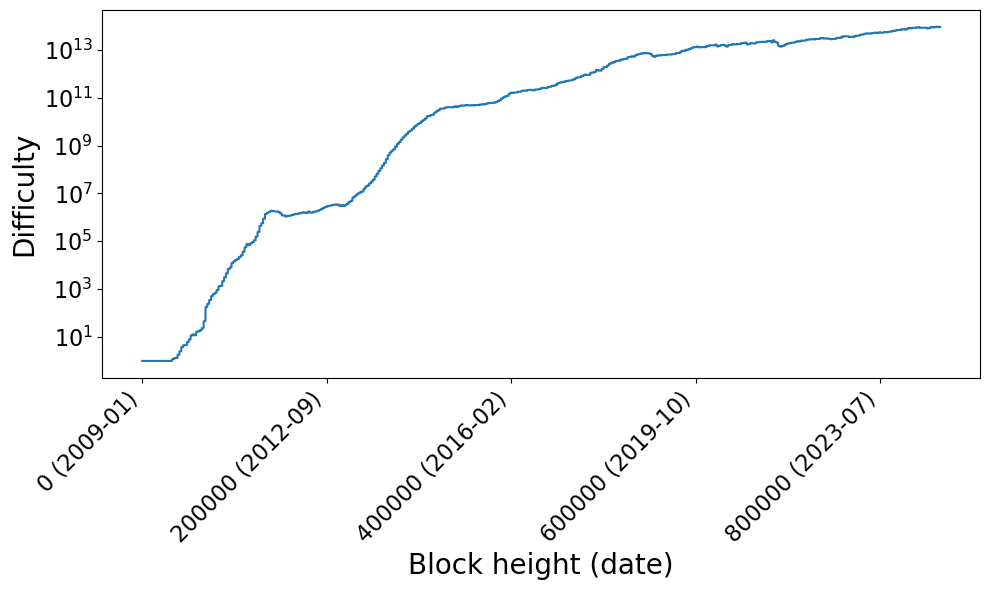

In [14]:
# Plot difficulty over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['difficulty'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Difficulty', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("difficulty-variation-over-time.pdf", format="pdf")
plt.show()

In [15]:
# Number of times the target increases, and their heights
target_increases_count = 0
target_increases_heights = []
prev_target = None
for i, target in enumerate(df['target']):
    if prev_target is not None and target > prev_target:
        target_increases_count += 1
        target_increases_heights.append(df['height'][i] - 1)  # Subtract 1 to get the height of the block that caused the increase
    prev_target = target
target_increases_count_percent = target_increases_count / (len(df)/2016) * 100

print(f"Target increases {target_increases_count} times ({target_increases_count_percent:.2f}%) out of {len(df)/2016} epochs.")
print(f"Target increases heights: {target_increases_heights}")

# Are the target increases heights multiples of 2016?
target_increases_heights_multiples = [height % 2016 == 0 for height in target_increases_heights]
print(f"Are the target increases heights multiples of 2016? {target_increases_heights_multiples}")

Target increases 90 times (20.97%) out of 429.0887896825397 epochs.
Target increases heights: [56448, 114912, 141120, 143136, 145152, 147168, 149184, 151200, 153216, 155232, 167328, 175392, 177408, 181440, 183456, 211680, 213696, 217728, 332640, 334656, 340704, 348768, 352800, 358848, 362880, 401184, 409248, 415296, 423360, 435456, 473760, 481824, 493920, 495936, 532224, 546336, 550368, 552384, 554400, 560448, 566496, 572544, 580608, 586656, 602784, 606816, 618912, 622944, 631008, 633024, 637056, 641088, 647136, 651168, 655200, 661248, 663264, 673344, 681408, 685440, 687456, 689472, 691488, 711648, 725760, 727776, 731808, 737856, 741888, 743904, 745920, 756000, 762048, 766080, 770112, 776160, 788256, 796320, 800352, 806400, 820512, 826560, 832608, 836640, 842688, 846720, 848736, 850752, 856800, 862848]
Are the target increases heights multiples of 2016? [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, T

/tmp/ipykernel_30822/798735610.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


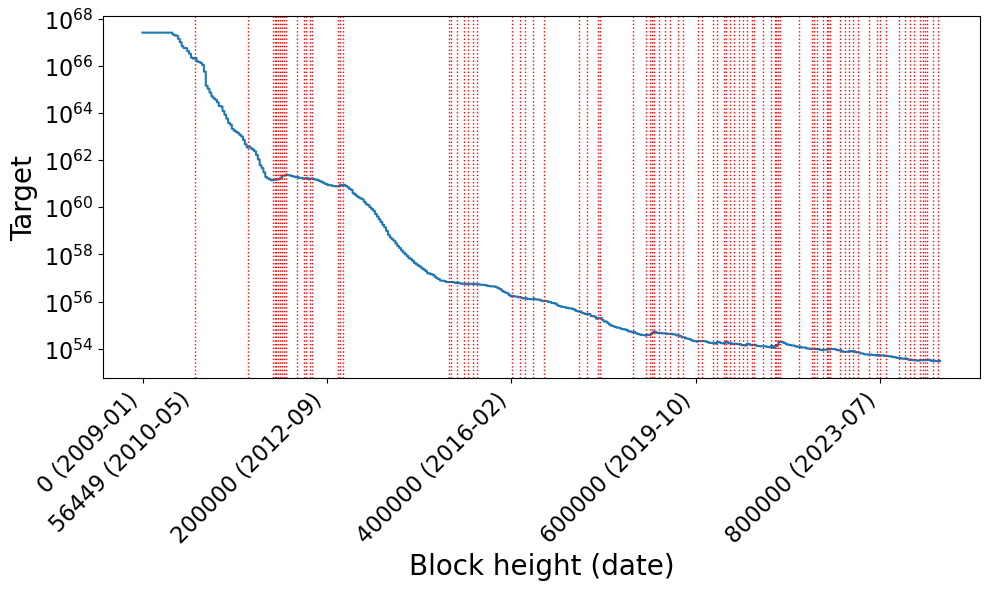

In [16]:
# Plot target over time with target increases
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['target'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Target', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

# Add vertical red lines when target increases
prev_target = None
first_line_label = False
for i, target in enumerate(df['target']):
    if prev_target is not None and target > prev_target:
        # print(df.iloc[i]['height']) # print block heights of red lines
        plt.axvline(x=df.iloc[i]['height'], color='red', linestyle=':', linewidth=1)
        if not first_line_label:
            plt.text(df.iloc[i]['height'], -0.025, f"{df.iloc[i]['height']} ({df.iloc[i]['timestamp_dt'].strftime('%Y-%m')})", transform=plt.gca().get_xaxis_transform(), ha='right', va='top', rotation=45, color='black', size=16)
            first_line_label = True
    prev_target = target

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("target-variation-over-time-with-increases.pdf", format="pdf")
plt.show()

/tmp/ipykernel_30822/3021322120.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


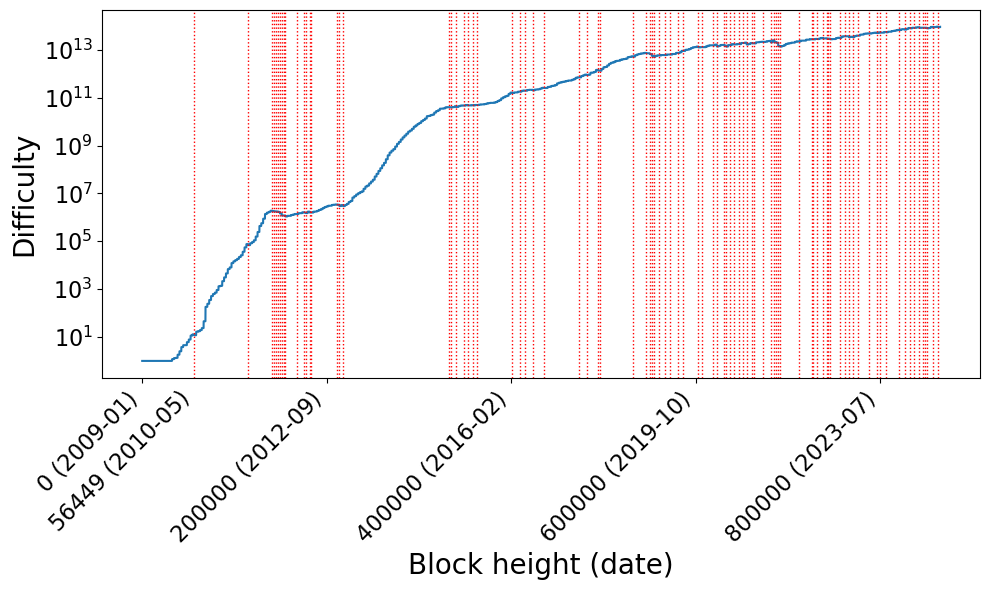

In [17]:
# Plot difficulty over time with difficulty decreases
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['difficulty'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Difficulty', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

# Add vertical red lines when difficulty decreases
prev_difficulty = None
first_line_label = False
for i, difficulty in enumerate(df['difficulty']):
    if prev_difficulty is not None and difficulty < prev_difficulty:
        # print(df.iloc[i]['height']) # print block heights of red lines
        plt.axvline(x=df.iloc[i]['height'], color='red', linestyle=':', linewidth=1)
        if not first_line_label:
            plt.text(df.iloc[i]['height'], -0.025, f"{df.iloc[i]['height']} ({df.iloc[i]['timestamp_dt'].strftime('%Y-%m')})", transform=plt.gca().get_xaxis_transform(), ha='right', va='top', rotation=45, color='black', size=16)
            first_line_label = True
    prev_difficulty = difficulty

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("difficulty-variation-over-time-with-drops.pdf", format="pdf")
plt.show()

/tmp/ipykernel_30822/2720499136.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


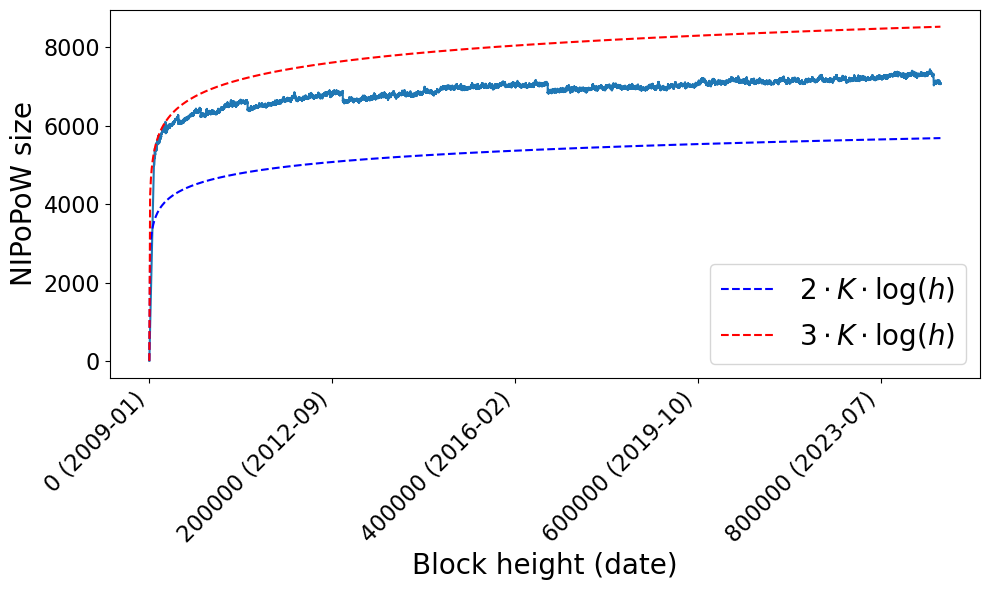

In [34]:
import numpy as np

K = 208

# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_size'], estimator=None, sort=False)

# Add lines for functions 2*K*log(x) and 3*K*log(x)
x_vals = np.linspace(df['height'].min(), df['height'].max(), 1000)  # Generate x values (block heights) for the log functions
y_vals_1 = 2 * K * np.log(x_vals)  # 2 * K * log(x)
y_vals_2 = 3 * K * np.log(x_vals)  # 3 * K * log(x)

# Use LaTeX notation with K in the label
plt.plot(x_vals, y_vals_1, label=r'$2 \cdot K \cdot \log(h)$', linestyle='--', color='blue')
plt.plot(x_vals, y_vals_2, label=r'$3 \cdot K \cdot \log(h)$', linestyle='--', color='red')

plt.xlabel('Block height (date)', size=20)
plt.ylabel('NIPoPoW size', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)

corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])

new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.legend(fontsize=20, loc='lower right')
plt.tight_layout()
plt.savefig("proof-size-variation-over-time.pdf", format="pdf")
plt.show()

/tmp/ipykernel_30822/1557901075.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


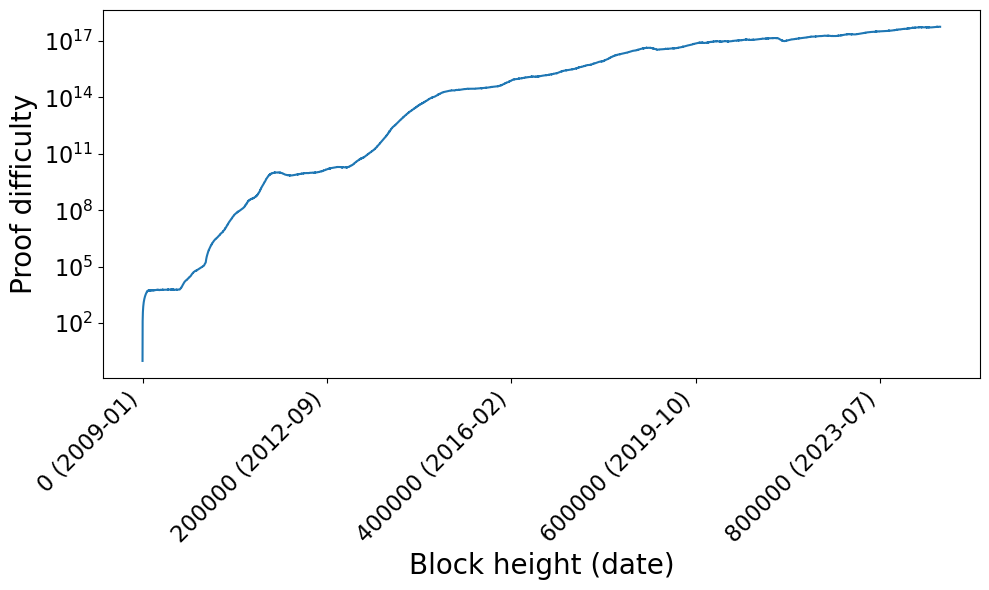

In [19]:
# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_score'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Proof difficulty', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("proof-difficulty-variation-over-time-logscale.pdf", format="pdf")
plt.show()

/tmp/ipykernel_30822/2954408213.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


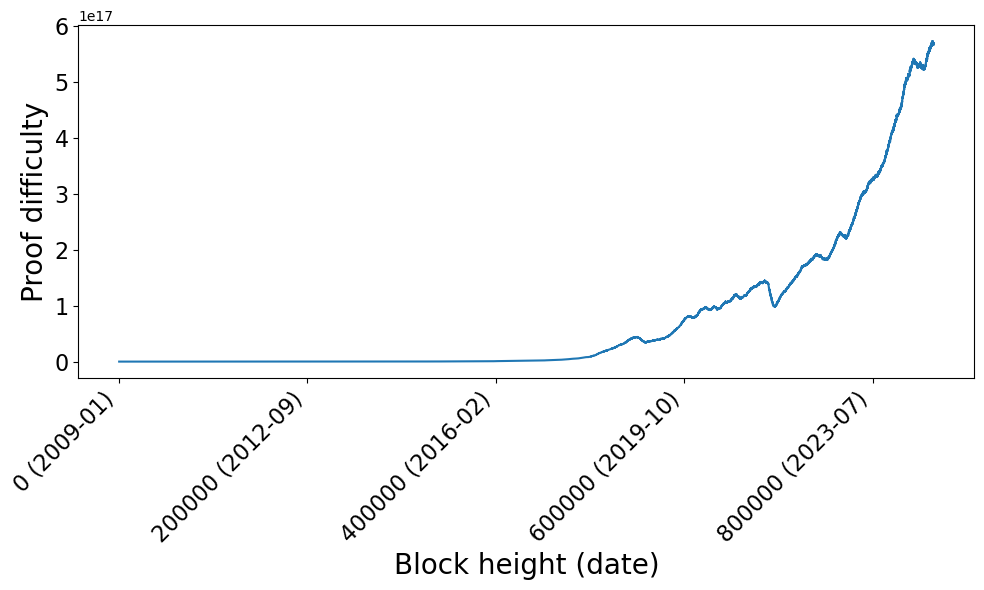

In [20]:
# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_score'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Proof difficulty', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("proof-difficulty-variation-over-time.pdf", format="pdf")
plt.show()

/tmp/ipykernel_30822/4134334549.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


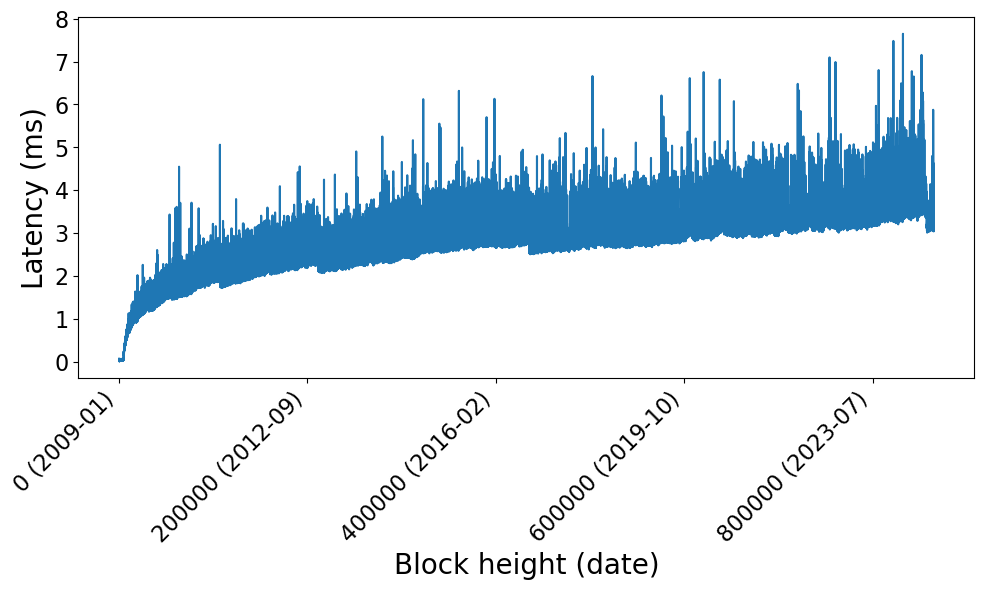

In [21]:
# Plot proof generation latency over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_generation_latency'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Latency (ms)', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("proof-generation-latency-over-time.pdf", format="pdf")
plt.show()

/tmp/ipykernel_30822/2166988307.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


Index([0, 868, 1753, 3262, 6192, 13296, 27173, 51668, 103117, 207234, 431228,
       853198],
      dtype='int64')


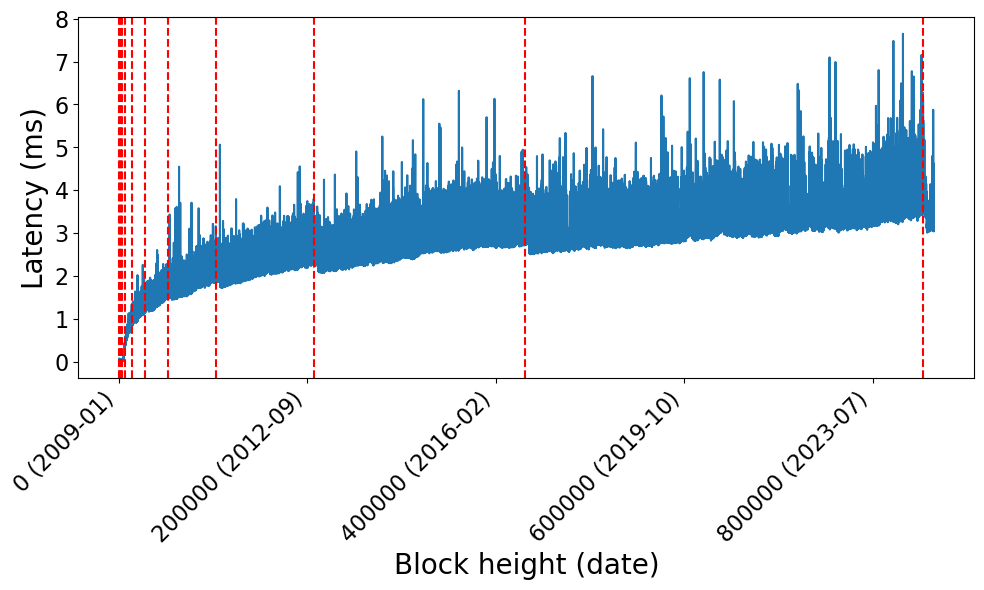

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the proof generation latency over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_generation_latency'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Latency (ms)', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels()  # Get the existing tick labels
orig_x_labels.pop(0)  # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels]  # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0)  # Add relevant popped label back into heights (0)
corresponding_dates = []  # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)]  # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Add vertical lines for proof level changes
proof_level_changes = df['proof_level'].ne(df['proof_level'].shift())  # Boolean series where proof level changes
proof_level_change_indices = proof_level_changes[proof_level_changes].index  # Get the indices where the change occurs
print(proof_level_change_indices)
for change_idx in proof_level_change_indices:
    plt.axvline(x=df.loc[change_idx, 'height'], color='r', linestyle='--', label='Proof Level Change')


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("proof-generation-latency-over-time-with-level-changes.pdf", format="pdf")
plt.show()


/tmp/ipykernel_30822/1343995278.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


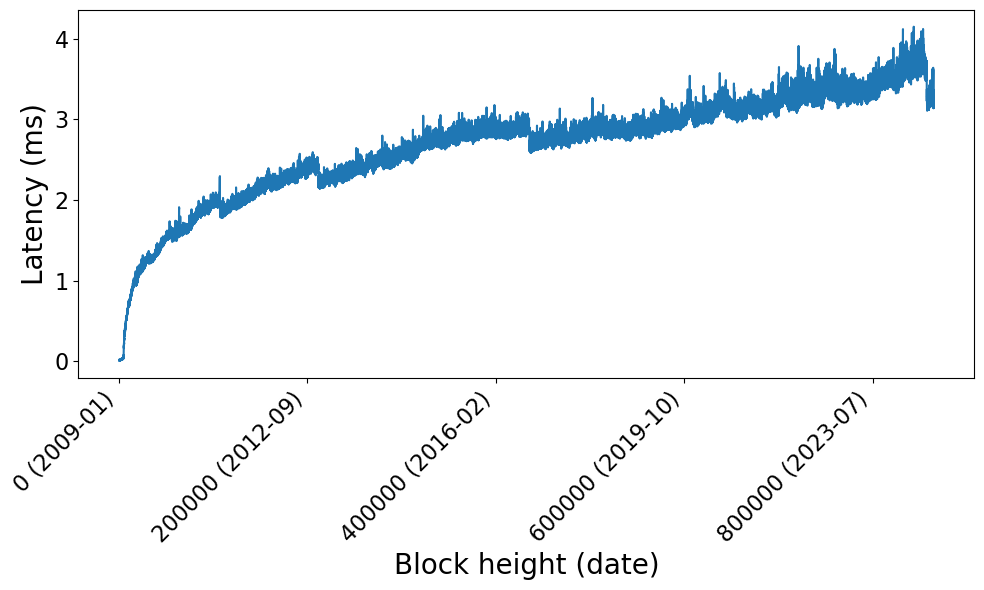

In [24]:
# Plot smoothed proof generation latency over time
df['smoothed_latency'] = df['proof_generation_latency'].rolling(window=10, center=True).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['smoothed_latency'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Latency (ms)', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("proof-generation-latency-over-time-smoothed.pdf", format="pdf")
plt.show()

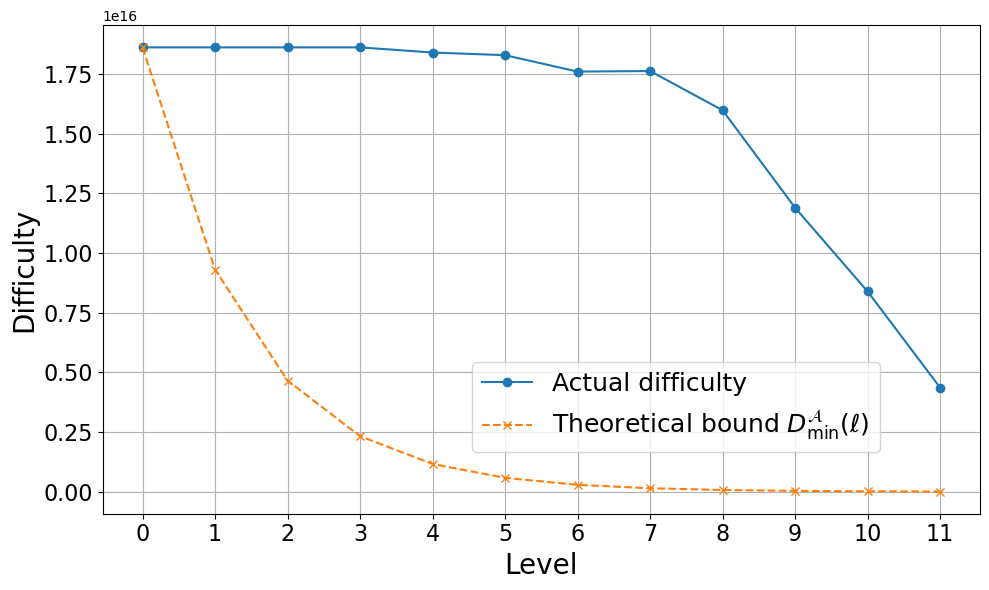

In [37]:
# Get the last row
last_row = df.iloc[-1]

# Get columns that match level_X_difficulty
level_cols = sorted(
    [col for col in df.columns if col.startswith("level_") and col.endswith("_difficulty")],
    key=lambda c: int(c.split("_")[1])
)

# Get last row level difficulties
last_row_difficulties = [last_row[col] for col in level_cols]

# Compute required difficulties
level_0_diff = last_row['level_0_difficulty']
theoretical_bounds = [level_0_diff / (2 ** mu) for mu in range(len(level_cols))]

# X-axis: level numbers
levels = list(range(len(level_cols)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(levels, last_row_difficulties, label='Actual difficulty', marker='o')
plt.plot(levels, theoretical_bounds, label=r'Theoretical bound $D^{\mathcal{A}}_{\mathrm{min}}(\ell)$', linestyle='--', marker='x')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Level', fontsize=20)
plt.ylabel('Difficulty', fontsize=20)
plt.xticks(levels)
plt.grid(True)
plt.legend(fontsize=18, loc='lower right', bbox_to_anchor=(0.9, 0.1))
plt.tight_layout()
plt.savefig("difficulty-vs-required-last-row.pdf", format="pdf")
plt.show()

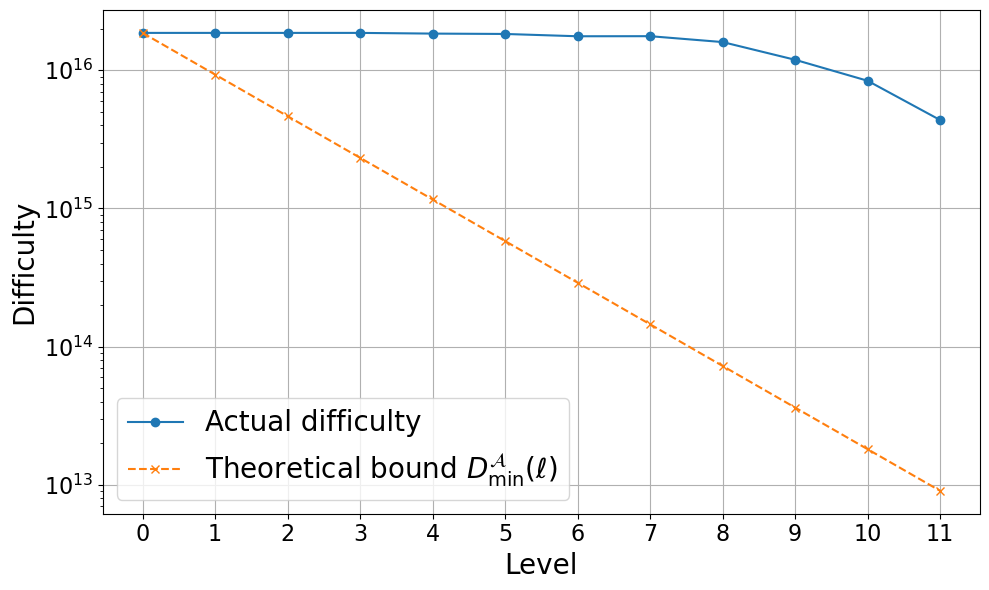

In [38]:
# Get the last row
last_row = df.iloc[-1]

# Get columns that match level_X_difficulty
level_cols = sorted(
    [col for col in df.columns if col.startswith("level_") and col.endswith("_difficulty")],
    key=lambda c: int(c.split("_")[1])
)

# Get last row level difficulties
last_row_difficulties = [last_row[col] for col in level_cols]

# Compute required difficulties
level_0_diff = last_row['level_0_difficulty']
theoretical_bounds = [level_0_diff / (2 ** mu) for mu in range(len(level_cols))]

# X-axis: level numbers
levels = list(range(len(level_cols)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(levels, last_row_difficulties, label='Actual difficulty', marker='o')
plt.plot(levels, theoretical_bounds, label=r'Theoretical bound $D^{\mathcal{A}}_{\mathrm{min}}(\ell)$', linestyle='--', marker='x')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Level', fontsize=20)
plt.ylabel('Difficulty', fontsize=20)
plt.xticks(levels)
plt.grid(True)
plt.legend(fontsize=20)

# Set y-axis to log scale
plt.yscale('log')

plt.tight_layout()
plt.savefig("difficulty-vs-required-last-row-logscale.pdf", format="pdf")
plt.show()